In [1]:
import process_db
import h5py
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import random
import umap
#random.seed(1)

rna_embeddings = np.loadtxt('./output/sce_10xPBMC_atac_skip_referenced_random_embeddings.txt')
atac_embeddings = np.loadtxt('./output/sce_10xPBMC_rna_skip_referenced_random_embeddings.txt')
print(rna_embeddings.shape)
print(atac_embeddings.shape)
embeddings =  np.concatenate((rna_embeddings, atac_embeddings))
print(embeddings.shape)
embeddings=np.nan_to_num(embeddings)
reducer = umap.UMAP(random_state=42)
reducer.fit(embeddings)


(30587, 64)
(30587, 64)
(61174, 64)


UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [2]:
embedding = reducer.transform(embeddings)
assert(np.all(embedding == reducer.embedding_))
embedding.shape

#tsne_results = TSNE(perplexity=30, n_iter = 1000).fit_transform(embeddings)
#tsne_results.shape
df = pd.DataFrame()
df['tSNE1'] = embedding[:,0]
df['tSNE2'] = embedding[:,1]
print("done")

done


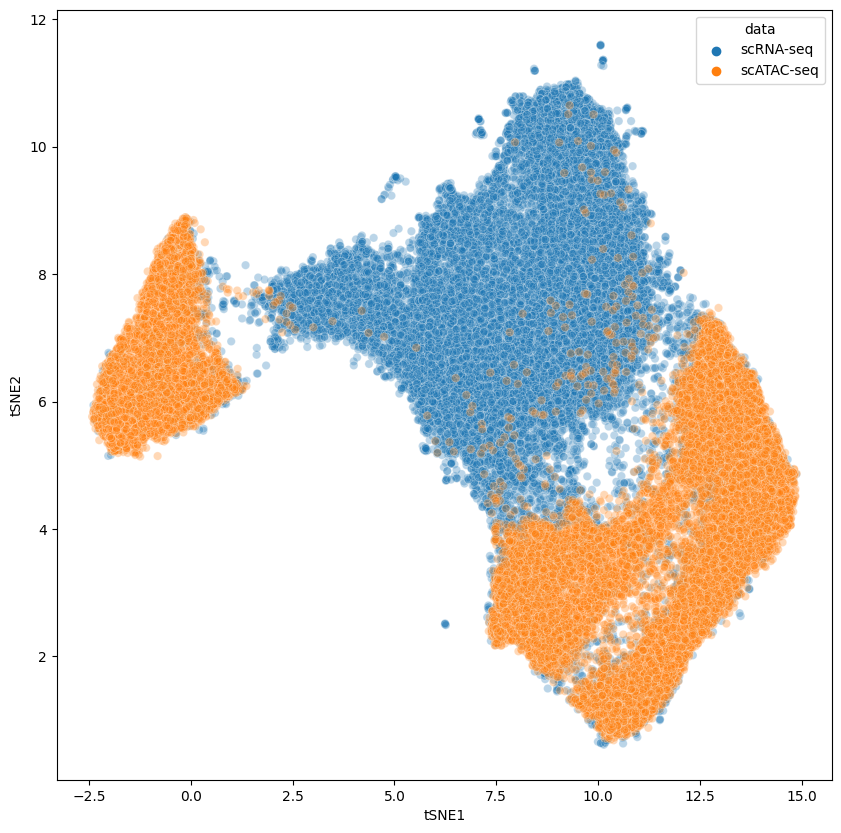

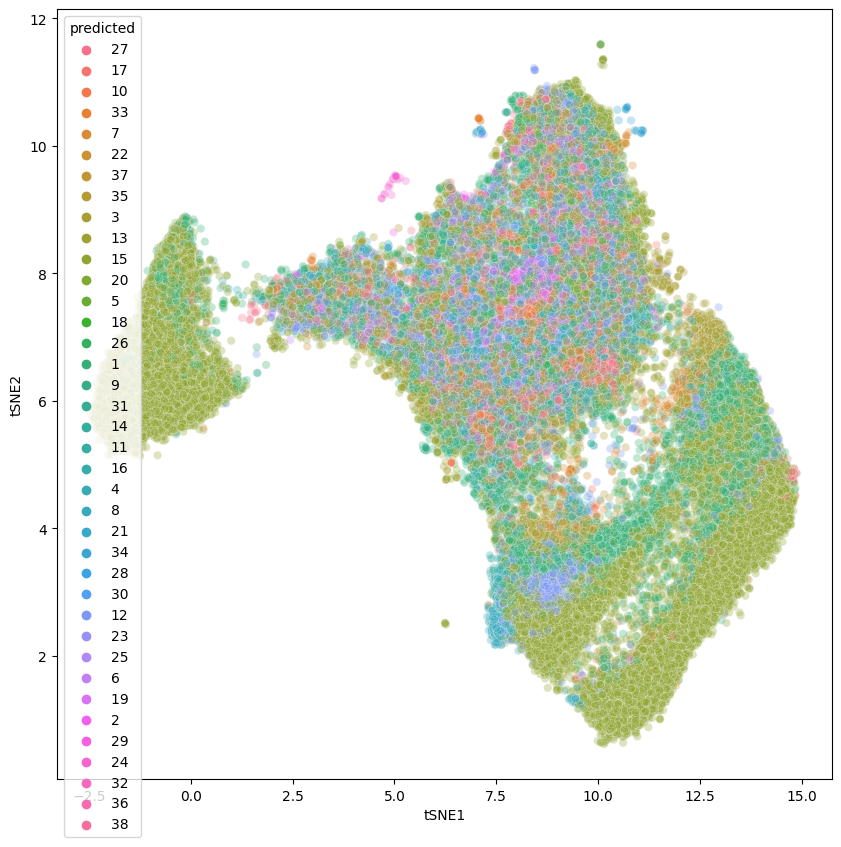

In [3]:
#print(df)
rna_labels = np.loadtxt('./data/maize_282.v8.3.scATAC_ALL_CELLs.metadata_reference_fixed_random.txt')
atac_predictions = np.loadtxt('./output/sce_10xPBMC_rna_skip_referenced_random_knn_predictions.txt')
labels =  np.concatenate((rna_labels, atac_predictions))
#print(df.shape)
#print(len(rna_labels))
#print(len(atac_predictions))
#print(len(labels))
label_to_idx = pd.read_csv('./data/label_to_idx.txt', sep = '\t', header = None)
label_to_idx.shape
label_dic = []
for i in range(label_to_idx.shape[0]):
    label_dic = np.append(label_dic, label_to_idx[0][i][:-2])

#print(label_dic)
#print(len(label_dic))
#print(labels)
#print(label_dic[labels.astype(int)[39]])

#print(labels)
#print(len(labels))
#print(label_dic[labels.astype(int)])
#print(len(label_dic[labels.astype(int)]))
#for x in labels.astype(int):
#    print(x)
#    print(label_dic[x])

data_label = np.array(["scRNA-seq", "scATAC-seq"])
df['data'] = np.repeat(data_label, [rna_embeddings.shape[0], atac_embeddings.shape[0]], axis=0)
#print(len(labels.astype(int)))
#print(df['data'])
#print(label_dic[labels.astype(int)])
#print(len(df['data']))
df['predicted'] = label_dic[labels.astype(int)]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_skip_referenced_umap_new1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_skip_referenced_umap_new2.png")

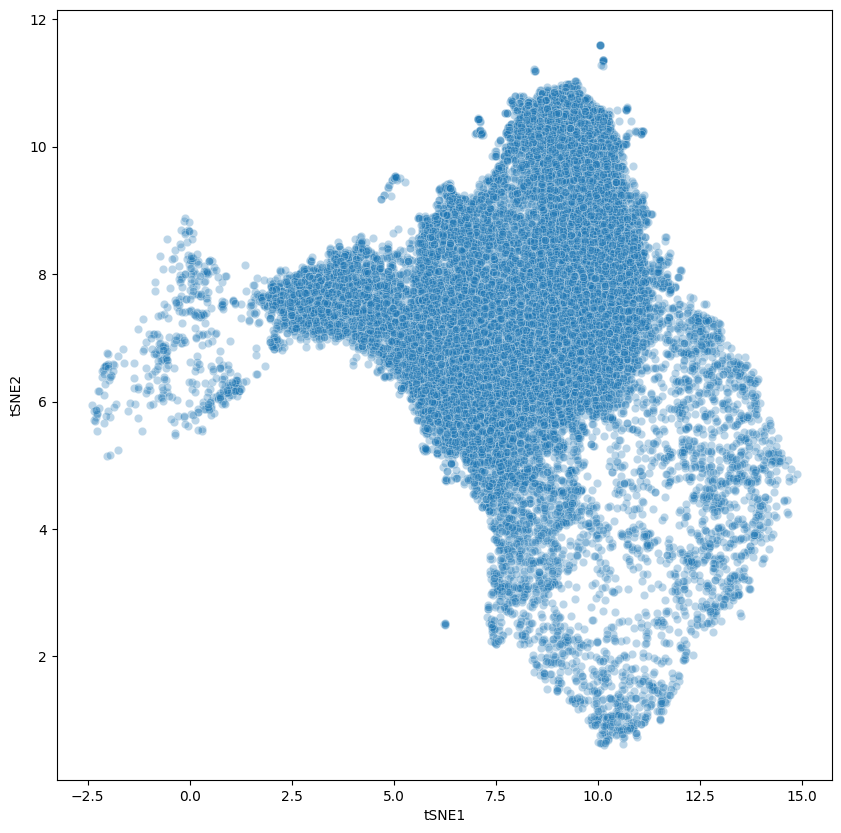

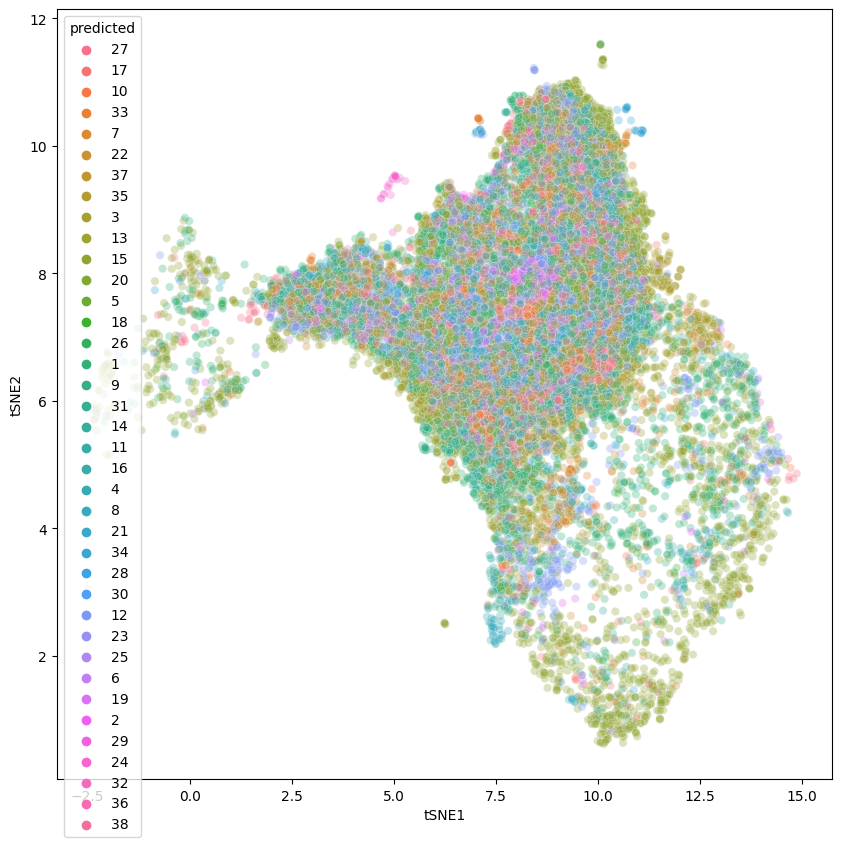

In [4]:
df_modi = df[df.data == "scRNA-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_random_umap_new1.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_random_umap_new1.png")

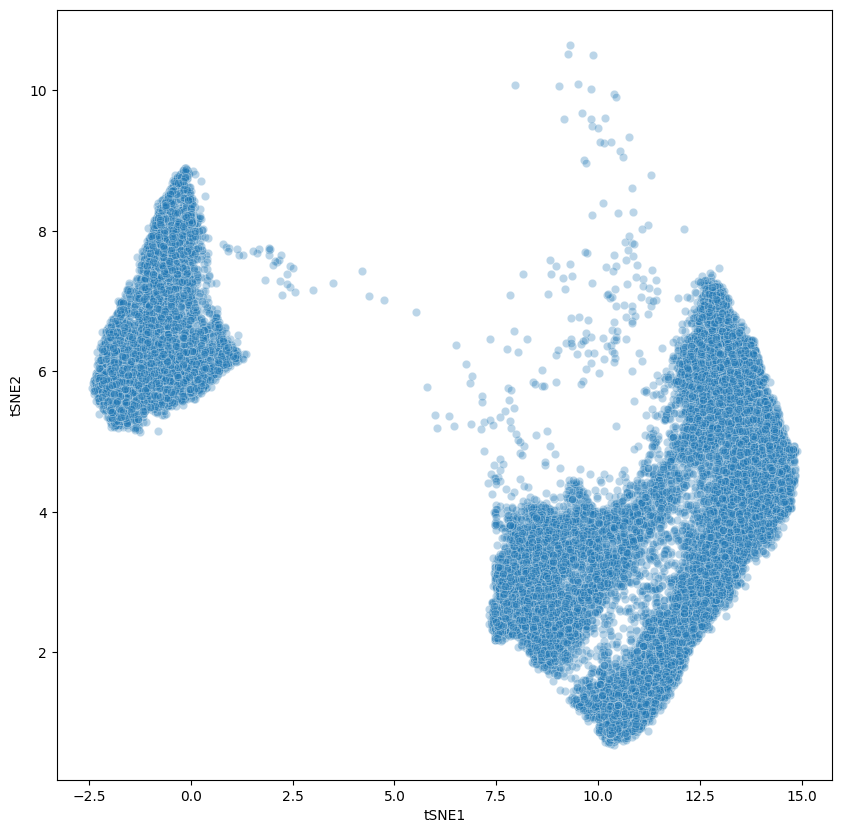

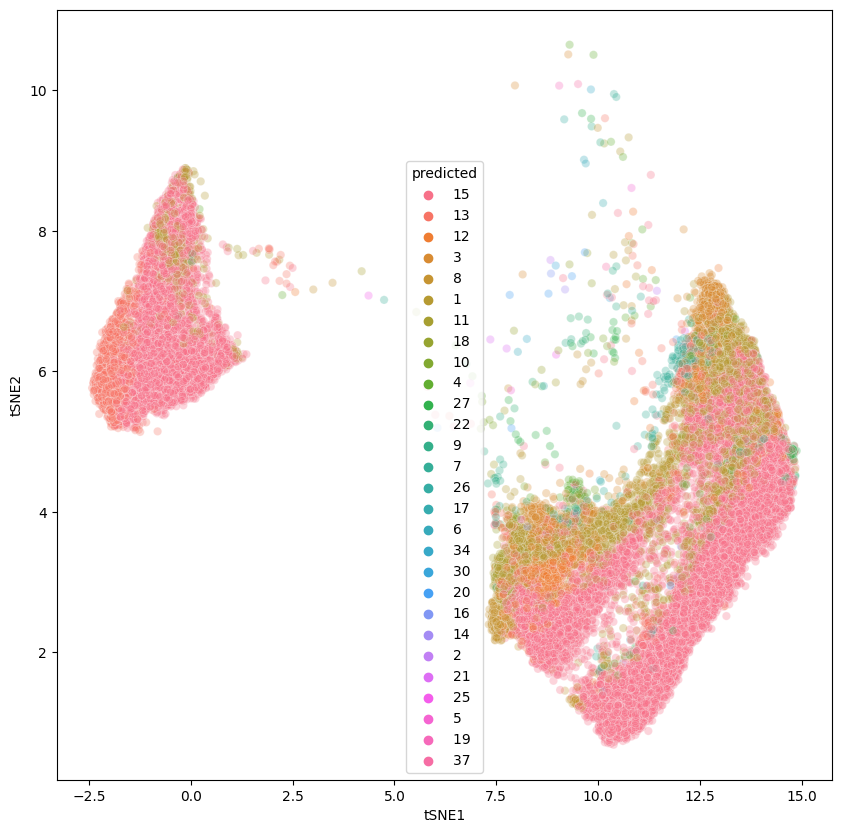

In [5]:
df_modi = df[df.data == "scATAC-seq"]

#df_modi = df_modi[df_modi.tSNE2 > -10]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    #hue = "data",
    palette = sns.color_palette("tab10", 2),
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_data_switched_random_umap_new2.png")

plt.figure(figsize=(10,10))
sns.scatterplot(
    x = "tSNE1", y = "tSNE2",
    hue = "predicted",
    data = df_modi,
    legend = "full",
    alpha = 0.3
)
plt.savefig("sc_predicted_switched_random_umap_new2.png")